In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

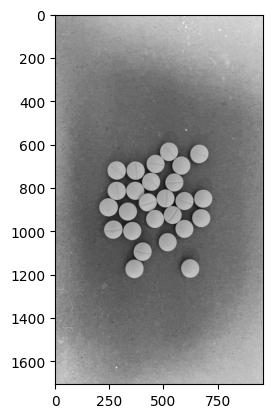

In [60]:
image = cv2.imread('./imgfiles/S__58916873.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

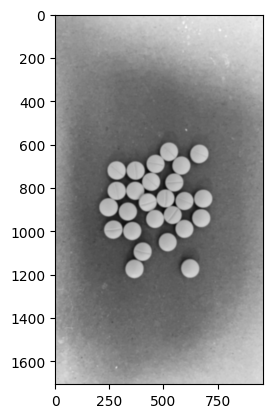

In [61]:
blur = cv2.GaussianBlur(gray, (15, 15), 0)
plt.imshow(blur, cmap='gray')

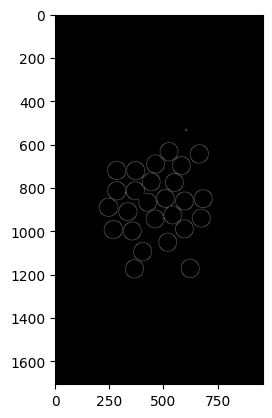

In [66]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

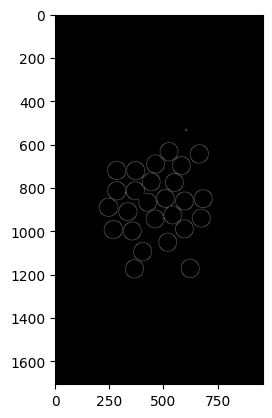

In [67]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')

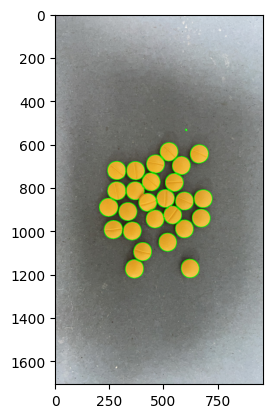

In [68]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.imshow(rgb)

In [69]:
print("coins in the image : ", len(cnt))


coins in the image :  30


pills in the image :  27


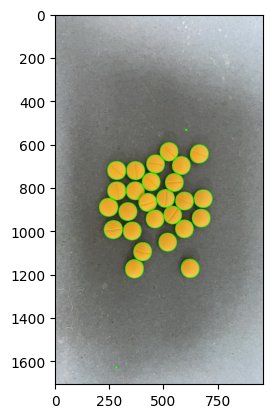

In [70]:
image = cv2.imread('./imgfiles/S__58916873.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (11, 11), 0)
canny = cv2.Canny(blur, 50, 150, 3)
dilated = cv2.dilate(canny, (1, 1), iterations=0)

(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.imshow(rgb)
print("pills in the image : ", len(cnt))

C:\Users\leadway\AppData\Local\Temp\ipykernel_33676\3787905875.py:21: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leadway\AppData\Local\Temp\ipykernel_33676\3787905875.py:21: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leadway\AppData\Local\Temp\ipykernel_33676\3787905875.py:21: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leadway\AppData\Local\Temp\ipykernel_33676\3787905875.py:21: UserWarning: Glyph 26223 (\N{CJK UNIFIED IDEOGRAPH-666F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leadway\AppData\Local\Temp\ipykernel_33676\3787905875.py:21: UserWarning: Glyph 21435 (\N{CJK UNIFIED IDEOGRAPH-53BB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leadway\AppData\Local\Temp\ipykernel_33676\3787905875.py:21: UserWarning: Gl

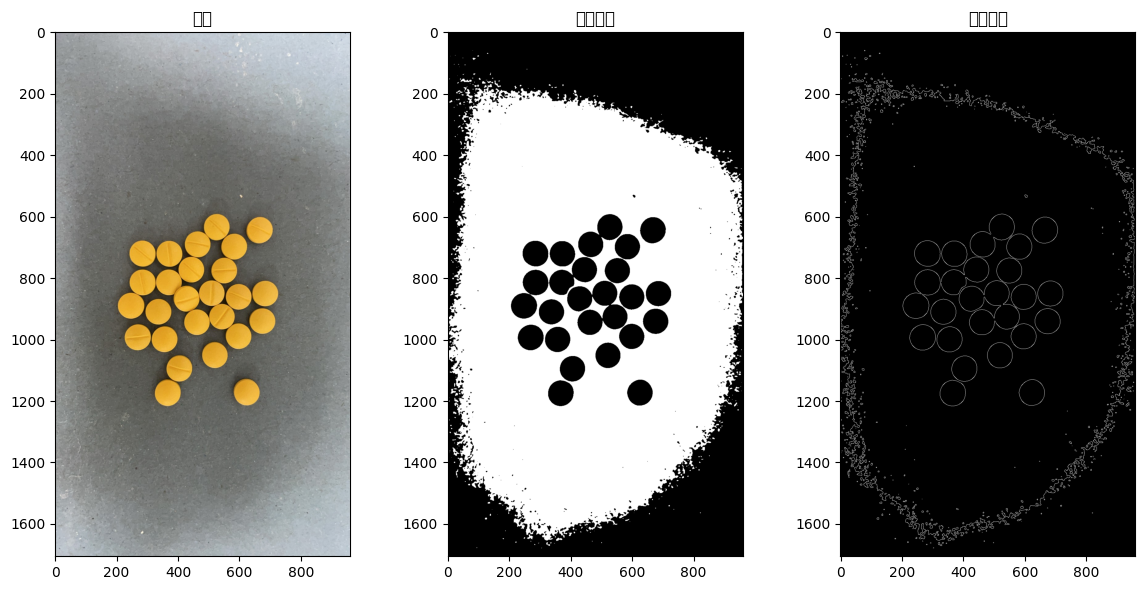

In [72]:
# 讀取影像
img = cv2.imread('./imgfiles/S__58916873.jpg')

# 轉為灰階
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 模糊化：降噪（避免偵測出毛邊）
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# 使用 Otsu 自動二值化去除背景
_, thresh = cv2.threshold(blur, 80, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 邊緣偵測（可視情況調整閾值）
edges = cv2.Canny(thresh, 50, 150)

# 顯示結果
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("原圖")
plt.subplot(1, 3, 2), plt.imshow(thresh, cmap='gray'), plt.title("背景去除")
plt.subplot(1, 3, 3), plt.imshow(edges, cmap='gray'), plt.title("邊緣偵測")
plt.tight_layout()
plt.show()

In [2]:
import cv2

In [4]:

# 嘗試開啟攝影機（0 代表第一支 USB 攝影機）
cap = cv2.VideoCapture(1)

# 確認攝影機有成功開啟
if not cap.isOpened():
    print("❌ 無法開啟攝影機！")
    exit()

# 等待攝影機暖機一小下
cap.read()  # 忽略第一幀

# 拍照
ret, frame = cap.read()

if ret:
    filename = "capture.jpg"
    cv2.imwrite(filename, frame)
    print(f"✅ 拍照成功，已儲存為：{filename}")
else:
    print("❌ 拍照失敗")

# 釋放攝影機資源
cap.release()


✅ 拍照成功，已儲存為：capture.jpg


In [5]:
import cv2
import numpy as np

# 初始化攝影機
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    print("❌ 無法開啟攝影機")
    exit()

# 設定 ROI 區域 (x, y, w, h)
roi = (100, 100, 400, 300)  # 你可以依實際畫面調整

print("📸 開始即時偵測，按 q 離開")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    x, y, w, h = roi
    roi_img = frame[y:y+h, x:x+w]

    # 灰階
    gray = cv2.cvtColor(roi_img, cv2.COLOR_BGR2GRAY)

    # 模糊
    blur = cv2.GaussianBlur(gray, (7, 7), 0)

    # 自動二值化（Otsu）
    _, thresh = cv2.threshold(blur, 80, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 邊緣偵測
    edges = cv2.Canny(thresh, 50, 150)

    # 找輪廓來計數
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    count = len(contours)

    # 顯示邊框和結果文字
    display = frame.copy()
    cv2.rectangle(display, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(display, f"數量: {count}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # 顯示畫面
    cv2.imshow('即時辨識 - 原始畫面', display)
    cv2.imshow('ROI - 邊緣偵測', edges)

    # 按 q 離開
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 結束
cap.release()
cv2.destroyAllWindows()

📸 開始即時偵測，按 q 離開


KeyboardInterrupt: 